In [1]:
import spacy
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word,TextBlob
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
df=pd.read_excel('train_movie-review.xlsx',names=['Review','Rating'])

### Data Exploration

In [33]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [34]:
df.apply(lambda x:[x.count(),x.unique()])

Review    [385, [Not Everybody loves Raymond.  The only ...
Rating                                    [385, [neg, pos]]
dtype: object

In [35]:
df.count()

Review    385
Rating    385
dtype: int64

Text(0.5,1,'Number of Reviews')

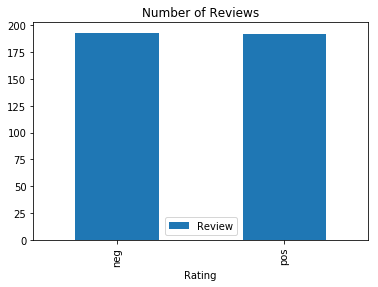

In [36]:
pd.pivot_table(df,index='Rating',values='Review',aggfunc='count').plot(kind='bar')
plt.title("Number of Reviews")

### Text Analysis

In [37]:
df[df['Rating']=='pos']['Review'].sample().values

array(['Love this show, but every episode seems to leave the viewer with more questions than answeres.'],
      dtype=object)

In [38]:
df[df['Rating']=='neg']['Review'].sample().values

array(['Tucker Carlson is right, Jon Stewart is the Butt-Boy For the entire liberal weenie crowd.'],
      dtype=object)

In [39]:
df['word_count']=df['Review'].apply(lambda x:len(str(x).split(" ")))
df.sort_values(by='word_count',ascending=False).head(6)

,Review,Rating,word_count
25,"In season 1 it was great, original, ist time a...",neg,202
383,Do yourself a favor: go out and rent (or buy!)...,pos,168
5,This has always been my favorite show until th...,neg,151
288,Jericho is the first TV program on the three m...,pos,142
158,"If anyone on the show should be replace, we ma...",neg,130
317,I\'m enjoying seeing what it might be like for...,pos,117


In [40]:
df['char_count']=df['Review'].str.len()
df.sort_values(by='char_count',ascending=False).head(6)

,Review,Rating,word_count,char_count
25,"In season 1 it was great, original, ist time a...",neg,202,997
383,Do yourself a favor: go out and rent (or buy!)...,pos,168,891
288,Jericho is the first TV program on the three m...,pos,142,805
5,This has always been my favorite show until th...,neg,151,767
158,"If anyone on the show should be replace, we ma...",neg,130,661
240,This is an awesome series that is thought prov...,pos,115,652


In [41]:
stop=stopwords.words('english')
df['stopwords']=df['Review'].apply(lambda x:len([x for x in x.split() if x in stop]))
df.sort_values(by='stopwords',ascending=False).head(6)

,Review,Rating,word_count,char_count,stopwords
25,"In season 1 it was great, original, ist time a...",neg,202,997,78
5,This has always been my favorite show until th...,neg,151,767,67
158,"If anyone on the show should be replace, we ma...",neg,130,661,57
383,Do yourself a favor: go out and rent (or buy!)...,pos,168,891,56
288,Jericho is the first TV program on the three m...,pos,142,805,53
317,I\'m enjoying seeing what it might be like for...,pos,117,611,50


In [42]:
df['uppercase_words']=df['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df.sort_values(by='uppercase_words',ascending=False).head(6)

,Review,Rating,word_count,char_count,stopwords,uppercase_words
282,"PEOPLE LET\'S FACE IT, TV GREATEST SHOW LOVE ...",pos,41,218,0,39
216,THIS IS THE BEST SHOW OF ALL TIME! THE PLOT IS...,pos,25,146,0,25
299,I LOVE THIS SHOW..THIS ONE OF THE BEST SHOWS I...,pos,23,141,0,23
284,GREAT SHOW. I CAN REALLY RELATE TO THE MODERN ...,pos,20,111,0,20
39,STUPID ASS SHOW. WOMEN DONT ACT OR THINK LIKE...,neg,20,92,0,17
260,THIS SHOW IS AWESOME! if you don\'t like it yo...,pos,46,243,18,10


## Preprocessing of Reviews

In [43]:
df['processed_review']=df['Review'].apply(lambda x:" ".join([x.lower() for x in x.split()]))
df.head(10)

,Review,Rating,word_count,char_count,stopwords,uppercase_words,processed_review
0,Not Everybody loves Raymond. The only joke he...,neg,91,496,40,0,not everybody loves raymond. the only joke her...
1,"Sorry, I\'ve given GA several chances and it\'...",neg,27,165,7,2,"sorry, i\'ve given ga several chances and it\'..."
2,David Caruso is just not good. He jut seems l...,neg,42,193,20,0,david caruso is just not good. he jut seems li...
3,"good show, but takes way too manybreaks!!!!!!!...",neg,7,51,2,0,"good show, but takes way too manybreaks!!!!!!!..."
4,I\'m not liking this new season. I really did...,neg,55,287,19,1,i\'m not liking this new season. i really didn...
5,This has always been my favorite show until th...,neg,151,767,67,3,this has always been my favorite show until th...
6,It would be better without David Caruso. Howe...,neg,31,162,9,1,it would be better without david caruso. howev...
7,I want Kate back and I\'m sick and tired of To...,neg,31,171,10,1,i want kate back and i\'m sick and tired of to...
8,I keep trying to watch and enjoy the show that...,neg,50,256,17,3,i keep trying to watch and enjoy the show that...
9,I\'m not impressed. It\'s not at all realisti...,neg,18,95,9,1,i\'m not impressed. it\'s not at all realistic...


In [44]:
df['processed_review']=df['processed_review'].str.replace('[^\w\s]','')
df.head(10)

,Review,Rating,word_count,char_count,stopwords,uppercase_words,processed_review
0,Not Everybody loves Raymond. The only joke he...,neg,91,496,40,0,not everybody loves raymond the only joke here...
1,"Sorry, I\'ve given GA several chances and it\'...",neg,27,165,7,2,sorry ive given ga several chances and its nev...
2,David Caruso is just not good. He jut seems l...,neg,42,193,20,0,david caruso is just not good he jut seems lik...
3,"good show, but takes way too manybreaks!!!!!!!...",neg,7,51,2,0,good show but takes way too manybreaks1
4,I\'m not liking this new season. I really did...,neg,55,287,19,1,im not liking this new season i really didnt l...
5,This has always been my favorite show until th...,neg,151,767,67,3,this has always been my favorite show until th...
6,It would be better without David Caruso. Howe...,neg,31,162,9,1,it would be better without david caruso howeve...
7,I want Kate back and I\'m sick and tired of To...,neg,31,171,10,1,i want kate back and im sick and tired of tony...
8,I keep trying to watch and enjoy the show that...,neg,50,256,17,3,i keep trying to watch and enjoy the show that...
9,I\'m not impressed. It\'s not at all realisti...,neg,18,95,9,1,im not impressed its not at all realistic and ...


In [45]:
df['processed_review']=df['processed_review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df.head(10)

,Review,Rating,word_count,char_count,stopwords,uppercase_words,processed_review
0,Not Everybody loves Raymond. The only joke he...,neg,91,496,40,0,everybody loves raymond joke idea actually fou...
1,"Sorry, I\'ve given GA several chances and it\'...",neg,27,165,7,2,sorry ive given ga several chances never deliv...
2,David Caruso is just not good. He jut seems l...,neg,42,193,20,0,david caruso good jut seems like forced say th...
3,"good show, but takes way too manybreaks!!!!!!!...",neg,7,51,2,0,good show takes way manybreaks1
4,I\'m not liking this new season. I really did...,neg,55,287,19,1,im liking new season really didnt like fact ch...
5,This has always been my favorite show until th...,neg,151,767,67,3,always favorite show past season new girl repl...
6,It would be better without David Caruso. Howe...,neg,31,162,9,1,would better without david caruso however amus...
7,I want Kate back and I\'m sick and tired of To...,neg,31,171,10,1,want kate back im sick tired tonys insecent ba...
8,I keep trying to watch and enjoy the show that...,neg,50,256,17,3,keep trying watch enjoy show fell love practic...
9,I\'m not impressed. It\'s not at all realisti...,neg,18,95,9,1,im impressed realistic dont care characters


In [46]:
df['processed_review']=df['processed_review'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df.head(10)

,Review,Rating,word_count,char_count,stopwords,uppercase_words,processed_review
0,Not Everybody loves Raymond. The only joke he...,neg,91,496,40,0,everybody love raymond joke idea actually foun...
1,"Sorry, I\'ve given GA several chances and it\'...",neg,27,165,7,2,sorry ive given ga several chance never delive...
2,David Caruso is just not good. He jut seems l...,neg,42,193,20,0,david caruso good jut seems like forced say th...
3,"good show, but takes way too manybreaks!!!!!!!...",neg,7,51,2,0,good show take way manybreaks1
4,I\'m not liking this new season. I really did...,neg,55,287,19,1,im liking new season really didnt like fact ch...
5,This has always been my favorite show until th...,neg,151,767,67,3,always favorite show past season new girl repl...
6,It would be better without David Caruso. Howe...,neg,31,162,9,1,would better without david caruso however amus...
7,I want Kate back and I\'m sick and tired of To...,neg,31,171,10,1,want kate back im sick tired tonys insecent ba...
8,I keep trying to watch and enjoy the show that...,neg,50,256,17,3,keep trying watch enjoy show fell love practic...
9,I\'m not impressed. It\'s not at all realisti...,neg,18,95,9,1,im impressed realistic dont care character


In [47]:
blob=TextBlob(df['Review'][10])
blob.sentiment.polarity,blob.sentiment.subjectivity

(0.25, 0.3625)

In [48]:
blob=TextBlob(df['processed_review'][10])
blob.sentiment.polarity,blob.sentiment.subjectivity

(0.5, 0.6)

In [49]:
def getPolarity(string):
    blob=TextBlob(string)
    return blob.sentiment.polarity

def getSubjectivity(string):
    blob=TextBlob(string)
    return blob.sentiment.subjectivity

df['org_polarity']=df['Review'].apply(getPolarity)
df['org_subjectivty']=df['Review'].apply(getSubjectivity)
df['processed_polarity']=df['processed_review'].apply(getPolarity)
df['processed_subjectivty']=df['processed_review'].apply(getSubjectivity)

In [50]:
df.sort_values(by='org_polarity',ascending=False).head(6)

,Review,Rating,word_count,char_count,stopwords,uppercase_words,processed_review,org_polarity,org_subjectivty,processed_polarity,processed_subjectivty
246,Hugh Laurie is to good!!! tumbs up to the wri...,pos,22,99,10,0,hugh laurie good tumbs writer u guy use sarcas...,1.0,0.6,0.7,0.6
298,greatest show ever in tv histori!!!!! =SMALLVILLE,pos,7,49,1,1,greatest show ever tv histori smallville,1.0,1.0,1.0,1.0
369,It\'s the best comedy show on tv bar none!,pos,9,42,2,0,best comedy show tv bar none,1.0,0.3,1.0,0.3
371,one of the best shows this season how ever i n...,pos,19,89,9,0,one best show season ever never know fox chang...,1.0,0.3,1.0,0.3
263,Probably the best show out there...,pos,6,35,2,0,probably best show,1.0,0.3,1.0,0.3
223,Best show ever... besides Seinfeld,pos,5,34,0,0,best show ever besides seinfeld,1.0,0.3,1.0,0.3


In [51]:
df.columns

Index(['Review', 'Rating', 'word_count', 'char_count', 'stopwords',
       'uppercase_words', 'processed_review', 'org_polarity',
       'org_subjectivty', 'processed_polarity', 'processed_subjectivty'],
      dtype='object')

In [52]:
df['Rating']=df['Rating'].astype('category')
df['Rating']=df['Rating'].cat.codes


In [53]:
df.sample(2)

,Review,Rating,word_count,char_count,stopwords,uppercase_words,processed_review,org_polarity,org_subjectivty,processed_polarity,processed_subjectivty
53,Commander and Chief is nothing more than liber...,0,37,253,11,0,commander chief nothing liberal ideology propa...,-0.180764,0.397778,-0.05,0.55
91,Possibly one of the worst shows I have ever seen.,0,10,49,3,1,possibly one worst show ever seen,-0.500000,1.000000,-0.50,1.00


### Model Preparation

In [54]:
X=df[['word_count', 'char_count', 'stopwords','uppercase_words', 'org_polarity','org_subjectivty', 'processed_polarity', 'processed_subjectivty']]
Y=df['Rating']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Performance on Validation Data")
print(classification_report(y_test, y_pred))


Performance on Validation Data
             precision    recall  f1-score   support

          0       0.75      0.70      0.73        47
          1       0.58      0.63      0.60        30

avg / total       0.68      0.68      0.68        77



In [65]:
df=pd.read_excel('train_movie-review.xlsx',names=['Review','Rating'])

# feature Engineering
df['word_count']=df['Review'].apply(lambda x:len(str(x).split(" ")))
df['char_count']=df['Review'].str.len()
df['stopwords']=df['Review'].apply(lambda x:len([x for x in x.split() if x in stop]))
df['uppercase_words']=df['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['processed_review']=df['Review'].apply(lambda x:" ".join([x.lower() for x in x.split()]))
df['processed_review']=df['processed_review'].str.replace('[^\w\s]','')
df['processed_review']=df['processed_review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df['processed_review']=df['processed_review'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df['org_polarity']=df['Review'].apply(getPolarity)
df['org_subjectivty']=df['Review'].apply(getSubjectivity)
df['processed_polarity']=df['processed_review'].apply(getPolarity)
df['processed_subjectivty']=df['processed_review'].apply(getSubjectivity)

df['Rating']=df['Rating'].astype('category')
df['Rating']=df['Rating'].cat.codes


# X=df[['word_count', 'char_count', 'stopwords','uppercase_words', 'org_polarity','org_subjectivty', 'processed_polarity', 'processed_subjectivty']]
X=df[['org_polarity','org_subjectivty','processed_polarity', 'processed_subjectivty']]
Y=df['Rating']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Performance on Validation Data, Accuracy: ",round(model.score(x_test,y_test),2))
print()
print(classification_report(y_test, y_pred))

Performance on Validation Data, Accuracy:  0.66

             precision    recall  f1-score   support

          0       0.71      0.74      0.73        47
          1       0.57      0.53      0.55        30

avg / total       0.66      0.66      0.66        77



### On Test Data

In [66]:
df=pd.read_excel('test_movie-review.xlsx',names=['Review','Rating'])

# feature Engineering
df['word_count']=df['Review'].apply(lambda x:len(str(x).split(" ")))
df['char_count']=df['Review'].str.len()
df['stopwords']=df['Review'].apply(lambda x:len([x for x in x.split() if x in stop]))
df['uppercase_words']=df['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['processed_review']=df['Review'].apply(lambda x:" ".join([x.lower() for x in x.split()]))
df['processed_review']=df['processed_review'].str.replace('[^\w\s]','')
df['processed_review']=df['processed_review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df['processed_review']=df['processed_review'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df['org_polarity']=df['Review'].apply(getPolarity)
df['org_subjectivty']=df['Review'].apply(getSubjectivity)
df['processed_polarity']=df['processed_review'].apply(getPolarity)
df['processed_subjectivty']=df['processed_review'].apply(getSubjectivity)

df['Rating']=df['Rating'].astype('category')
df['Rating']=df['Rating'].cat.codes

# X=df[['word_count', 'char_count', 'stopwords','uppercase_words', 'org_polarity','org_subjectivty', 'processed_polarity', 'processed_subjectivty']]
X=df[['org_polarity','org_subjectivty','processed_polarity', 'processed_subjectivty']]
Y=df['Rating']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model=RandomForestClassifier()
# model.fit(x_train,y_train)
Y_pred=model.predict(X)

print("Performance on Test Data")
print(classification_report(Y, Y_pred))


Performance on Test Data
             precision    recall  f1-score   support

          0       0.80      0.85      0.83        39
          1       0.85      0.80      0.83        41

avg / total       0.83      0.82      0.82        80



## Method-2

In [88]:
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
import nltk.classify.util

In [89]:
df=pd.read_excel('train_movie-review.xlsx',names=['Review','Rating'])
df['Review']=df['Review'].apply(lambda x:" ".join(x.lower() for x in x.split(" ")))
stop_words = set(stopwords.words('english'))
df['split_review']=df['Review'].apply(lambda x:[x for x in x.split(" ") if x not in stop_words])

def word_feats(words):
    return dict([(word,True) for word in words])

df['split_review']=df['split_review'].apply(word_feats)
df['new_review'] = df.apply(lambda x:[x.split_review,x.Rating], axis=1)


In [90]:
classifier  = NaiveBayesClassifier.train(df.new_review.values)

In [91]:
df=pd.read_excel('test_movie-review.xlsx',names=['Review','Rating'])
df['Review']=df['Review'].apply(lambda x:" ".join(x.lower() for x in x.split(" ")))
stop_words = set(stopwords.words('english'))
df['split_review']=df['Review'].apply(lambda x:[x for x in x.split(" ") if x not in stop_words])

def word_feats(words):
    return dict([(word,True) for word in words])

df['split_review']=df['split_review'].apply(word_feats)
df['test_review'] = df.apply(lambda x:[x.split_review,x.Rating], axis=1)

In [92]:
accuracy = nltk.classify.util.accuracy(classifier,df.test_review.values)
print(accuracy * 100)

72.5


In [93]:
print(accuracy * 100)

72.5


In [94]:
classifier.show_most_informative_features(15)

Most Informative Features
                    best = True              pos : neg    =     10.8 : 1.0
                   show! = True              pos : neg    =     10.4 : 1.0
                      tv = True              pos : neg    =      7.4 : 1.0
                    used = True              neg : pos    =      7.0 : 1.0
                   great = True              pos : neg    =      6.4 : 1.0
                favorite = True              pos : neg    =      6.4 : 1.0
                  second = True              pos : neg    =      5.0 : 1.0
                    must = True              pos : neg    =      5.0 : 1.0
                 liberal = True              neg : pos    =      5.0 : 1.0
                   women = True              neg : pos    =      5.0 : 1.0
                 finally = True              pos : neg    =      4.4 : 1.0
                 someone = True              pos : neg    =      4.4 : 1.0
                    miss = True              pos : neg    =      4.4 : 1.0

In [100]:
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '